# **Домашнее задание к семинару 06**


## <U>Загрузка данных и первичный анализ</U>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.inspection import permutation_importance

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [53]:
df = pd.read_csv('S06-hw-dataset-01.csv')
print("--- Первые 5 строк (head) ---")
display(df.head())

print("\nИнформация о датасете ---")
df.info()

--- Первые 5 строк (head) ---


,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
0,1,-0.946058,-0.070313,1.824445,-2.754422,0.808865,-0.111094,-0.268950,-3.078210,0.801275,...,-1.616515,-1.989464,1.407390,-0.218362,2.016052,0,2,3,33,0
1,2,-2.484027,0.739378,1.596908,-2.586479,-0.033225,-3.054412,-4.706908,-9.795169,0.145911,...,-1.727040,-0.583997,1.136761,0.285978,-0.310879,2,2,2,102,1
2,3,1.522629,7.159635,-0.564903,-4.493110,1.623610,5.450187,-0.974595,-5.189589,1.600591,...,0.524408,2.022430,1.278358,-0.850547,0.847457,1,0,2,3,0
3,4,0.463373,-1.073908,1.752813,0.362786,2.790872,4.082385,0.322283,3.390984,-0.033929,...,2.399834,-1.431576,-0.746987,0.049639,2.414689,1,0,1,50,0
4,5,3.188390,-4.701692,-0.689918,-0.448995,0.373821,-3.275363,-1.760931,0.923689,0.537345,...,-2.183407,-2.896590,2.440343,-1.097168,1.457323,1,2,3,81,0



Информация о датасете ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12000 non-null  int64  
 1   num01          12000 non-null  float64
 2   num02          12000 non-null  float64
 3   num03          12000 non-null  float64
 4   num04          12000 non-null  float64
 5   num05          12000 non-null  float64
 6   num06          12000 non-null  float64
 7   num07          12000 non-null  float64
 8   num08          12000 non-null  float64
 9   num09          12000 non-null  float64
 10  num10          12000 non-null  float64
 11  num11          12000 non-null  float64
 12  num12          12000 non-null  float64
 13  num13          12000 non-null  float64
 14  num14          12000 non-null  float64
 15  num15          12000 non-null  float64
 16  num16          12000 non-null  float64
 17  num17          12000 no

In [54]:
print("\n--- Описательная статистика ---")
df.describe()


--- Описательная статистика ---


,id,num01,num02,num03,num04,num05,num06,num07,num08,num09,...,num20,num21,num22,num23,num24,cat_contract,cat_region,cat_payment,tenure_months,target
count,12000.00000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,...,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,0.013705,-0.005278,-0.002357,0.038404,-0.006301,-0.865297,-0.702877,-0.290694,-0.008154,...,-0.323083,-1.314833,0.319798,-0.002742,0.027459,0.988750,1.990167,1.506833,36.083833,0.323417
std,3464.24595,2.096534,3.544498,1.004417,2.087318,1.007329,3.888966,1.989513,3.455981,0.996677,...,2.167066,3.731384,2.223649,0.996454,1.882359,0.815687,1.411643,1.121558,25.061218,0.467800
min,1.00000,-8.155181,-14.605579,-4.374043,-7.753301,-3.999332,-15.238402,-7.377252,-13.853627,-3.794637,...,-8.371050,-14.249204,-8.638879,-3.532093,-7.923990,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,-1.423844,-2.303772,-0.685618,-1.374579,-0.676552,-3.532054,-2.064888,-2.597019,-0.683959,...,-1.808969,-3.863063,-1.097700,-0.676150,-1.110822,0.000000,1.000000,0.000000,17.000000,0.000000
50%,6000.50000,-0.047565,0.053348,-0.009186,0.038766,-0.003728,-1.092517,-0.795907,-0.208245,-0.020883,...,-0.383940,-1.393400,0.431804,0.006297,0.279689,1.000000,2.000000,2.000000,30.000000,0.000000
75%,9000.25000,1.422676,2.335937,0.671441,1.484417,0.669269,1.526389,0.522625,2.093169,0.666959,...,1.125140,1.116111,1.853491,0.657478,1.363896,2.000000,3.000000,3.000000,49.000000,1.000000
max,12000.00000,8.610863,16.299709,3.651692,7.571965,4.562115,16.223054,8.006444,13.030011,3.976868,...,7.957847,15.937281,8.102095,3.707905,7.549514,2.000000,4.000000,3.000000,120.000000,1.000000


In [55]:
print("\n--- Проверка пропусков ---")
df.isnull().sum()


--- Проверка пропусков ---


id               0
num01            0
num02            0
num03            0
num04            0
num05            0
num06            0
num07            0
num08            0
num09            0
num10            0
num11            0
num12            0
num13            0
num14            0
num15            0
num16            0
num17            0
num18            0
num19            0
num20            0
num21            0
num22            0
num23            0
num24            0
cat_contract     0
cat_region       0
cat_payment      0
tenure_months    0
target           0
dtype: int64

In [56]:
# анализ долей классов
target_counts = df['target'].value_counts(normalize=True)
print("--- Распределение целевой переменной (доли) ---")
target_counts

--- Распределение целевой переменной (доли) ---


target
0    0.676583
1    0.323417
Name: proportion, dtype: float64

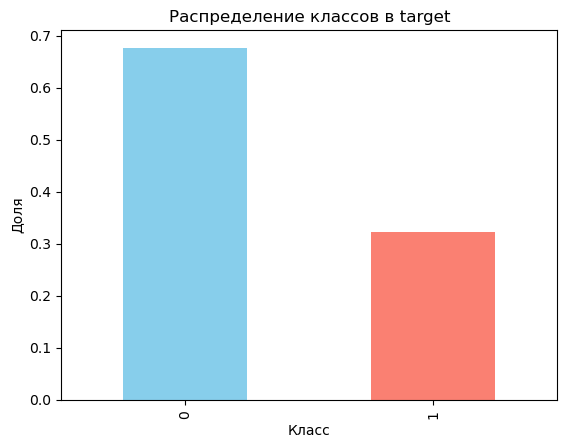

In [57]:
target_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Распределение классов в target')
plt.xlabel('Класс')
plt.ylabel('Доля')
plt.show()

In [58]:
X = df.drop(columns=['target', 'id'], errors='ignore')
y = df['target']

print(f"Форма признаков X: {X.shape}")
print(f"Форма таргета y: {y.shape}")

Форма признаков X: (12000, 28)
Форма таргета y: (12000,)


---

## <U>Train/Test-сплит и воспроизводимость</U>

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Размер обучающей выборки: {X_train.shape[0]} строк")
print(f"Размер тестовой выборки: {X_test.shape[0]} строк")

Размер обучающей выборки: 9600 строк
Размер тестовой выборки: 2400 строк


**Почему это важно?**

- <u>Фиксированный seed</u>: гарантирует, что при каждом запуске кода данные будут делиться одинаково.

Это необходимо для воспроизводимости результатов: если мы изменим модель, то будем уверены, что разница в метриках вызвана именно моделью, а не тем, что в тест попали "более легкие" примеры.

- <u>Стратификация</u>: сохраняет пропорции классов в обеих выборках.

Если в исходных данных было 20% объектов класса "1", то и в train, и в test их останется примерно 20%.
Это критично для классификации, чтобы модель не обучалась на одном классе, игнорируя другой.

---

## <U>Baseline’ы</U>

In [60]:
# Dummy Classifier
# наивный прогноз по самому частому классу
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_pred = dummy_clf.predict(X_test)

print("--- Метрики Dummy Classifier ---")
print(classification_report(y_test, dummy_pred, zero_division=0))

--- Метрики Dummy Classifier ---
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      1624
           1       0.00      0.00      0.00       776

    accuracy                           0.68      2400
   macro avg       0.34      0.50      0.40      2400
weighted avg       0.46      0.68      0.55      2400



In [61]:
# Logistic Regression
log_reg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(random_state=42))
])

log_reg_pipe.fit(X_train, y_train)
log_reg_pred = log_reg_pipe.predict(X_test)

print("\n--- Метрики Logistic Regression ---")
print(classification_report(y_test, log_reg_pred))


--- Метрики Logistic Regression ---


              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1624
           1       0.78      0.65      0.71       776

    accuracy                           0.83      2400
   macro avg       0.81      0.78      0.79      2400
weighted avg       0.82      0.83      0.82      2400



**1. Dummy Classifier (Наивный прогноз)**

* **Результат:** Accuracy $0.68$, F1-score для класса «1» — $0.00$.
* **Это значит:** наш датасет <u>несбалансирован</u>. Примерно $68\%$ данных относятся к классу «0» (мажоритарный класс). Модель просто всегда говорит «0».
* **Вывод:** она угадывает в $68\%$ случаев, но абсолютно бесполезна для поиска целевых событий (класса «1»), так как её полнота (Recall) для них равна нулю.

**2. Logistic Regression (Линейный baseline)**

* **Результат:** Accuracy $0.83$, F1-score для класса «1» — $0.71$.
* **Это значит:**

-- **Accuracy ($0.83$):** ошибки гораздо реже. Прирост в $15\%$ относительно Dummy говорит о том, что в признаках есть четкая логика.

-- **Precision ($0.78$):** если логистическая регрессия предсказывает «1», она оказывается права почти в $8$ из $10$ случаев. Это неплохой показатель «чистоты» прогноза.

-- **Recall ($0.65$):** модель находит $65\%$ всех реальных объектов класса «1». $35\%$ целевых событий мы всё ещё пропускаем.


* **Вывод:** Модель адекватна, но её линейная природа, вероятно, не позволяет уловить более сложные зависимости.

Общий итог

Лог. рег. показала себя как сильный baseline, значительно опередив наивный прогноз. Однако разрыв между Precision ($0.78$) и Recall ($0.65$) намекает на то, что модель осторожничает в предсказании целевого класса.



---

## <U>Модели недели 6 и метрики качества </U>

In [62]:
# словарь для хранения результатов
results = {}

# вспомогательная функция для оценки
def evaluate_model(model, name, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 0

    results[name] = {'Accuracy': acc, 'F1': f1, 'ROC-AUC': auc}
    print(f"--- {name} ---")
    print(f"Best Params: {model.best_params_}")
    print(f"Accuracy: {acc:.4f}, F1: {f1:.4f}, ROC-AUC: {auc:.4f}\n")

In [63]:
# DecisionTreeClassifier
dt_params = {
    'model__max_depth': [3, 5, 8, 12],
    'model__min_samples_leaf': [1, 5, 10, 20]
}
dt_pipe = Pipeline([('scaler', StandardScaler()), ('model', DecisionTreeClassifier(random_state=42))])
dt_grid = GridSearchCV(dt_pipe, dt_params, cv=5, scoring='f1', n_jobs=-1)
dt_grid.fit(X_train, y_train)

evaluate_model(dt_grid, 'DecisionTree', X_test, y_test)

--- DecisionTree ---
Best Params: {'model__max_depth': 12, 'model__min_samples_leaf': 5}
Accuracy: 0.8717, F1: 0.7944, ROC-AUC: 0.8845



In [64]:
# RandomForestClassifier
rf_params = {
    'model__max_features': ['sqrt', 'log2'],
    'model__min_samples_leaf': [2, 5]
}
rf_pipe = Pipeline([('scaler', StandardScaler()), ('model', RandomForestClassifier(random_state=42))])
rf_grid = GridSearchCV(rf_pipe, rf_params, cv=5, scoring='f1', n_jobs=-1)
rf_grid.fit(X_train, y_train)

evaluate_model(rf_grid, 'RandomForest', X_test, y_test)

--- RandomForest ---
Best Params: {'model__max_features': 'sqrt', 'model__min_samples_leaf': 2}
Accuracy: 0.9246, F1: 0.8775, ROC-AUC: 0.9648



In [65]:
# GradientBoostingClassifier
gb_params = {
    'model__learning_rate': [0.05, 0.1],
    'model__n_estimators': [100],
    'model__max_depth': [3, 5]
}
gb_pipe = Pipeline([('scaler', StandardScaler()), ('model', GradientBoostingClassifier(random_state=42))])
gb_grid = GridSearchCV(gb_pipe, gb_params, cv=5, scoring='f1', n_jobs=-1)
gb_grid.fit(X_train, y_train)

evaluate_model(gb_grid, 'GradientBoosting', X_test, y_test)

--- GradientBoosting ---
Best Params: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 100}
Accuracy: 0.9192, F1: 0.8686, ROC-AUC: 0.9640




## <U>Диагностические графики</U>

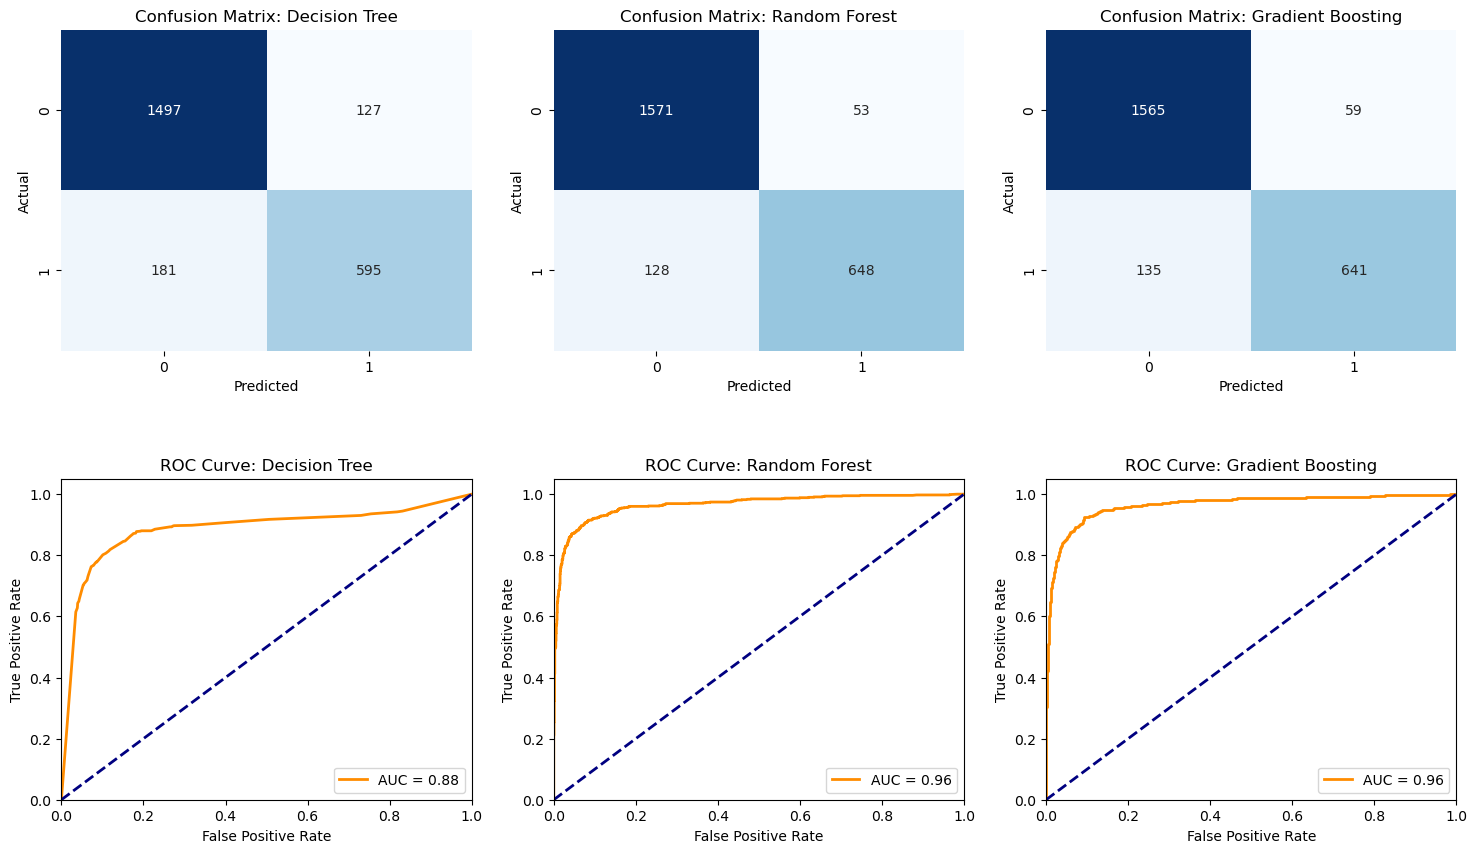

In [66]:
models_to_plot = {
    "Decision Tree": dt_grid,
    "Random Forest": rf_grid,
    "Gradient Boosting": gb_grid
}

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
plt.subplots_adjust(hspace=0.4)

for i, (name, model) in enumerate(models_to_plot.items()):
    # confusion matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', ax=axes[0, i], cmap='Blues', cbar=False)
    axes[0, i].set_title(f"Confusion Matrix: {name}")
    axes[0, i].set_xlabel("Predicted")
    axes[0, i].set_ylabel("Actual")

    # ROC- кривая
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_val = results[name.replace(" ", "")]['ROC-AUC']

    axes[1, i].plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_val:.2f}')
    axes[1, i].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1, i].set_xlim([0.0, 1.0])
    axes[1, i].set_ylim([0.0, 1.05])
    axes[1, i].set_xlabel('False Positive Rate')
    axes[1, i].set_ylabel('True Positive Rate')
    axes[1, i].set_title(f"ROC Curve: {name}")
    axes[1, i].legend(loc="lower right")

plt.show()

## <U>Интерпретация</U>

Лучшая модель для анализа: RandomForest


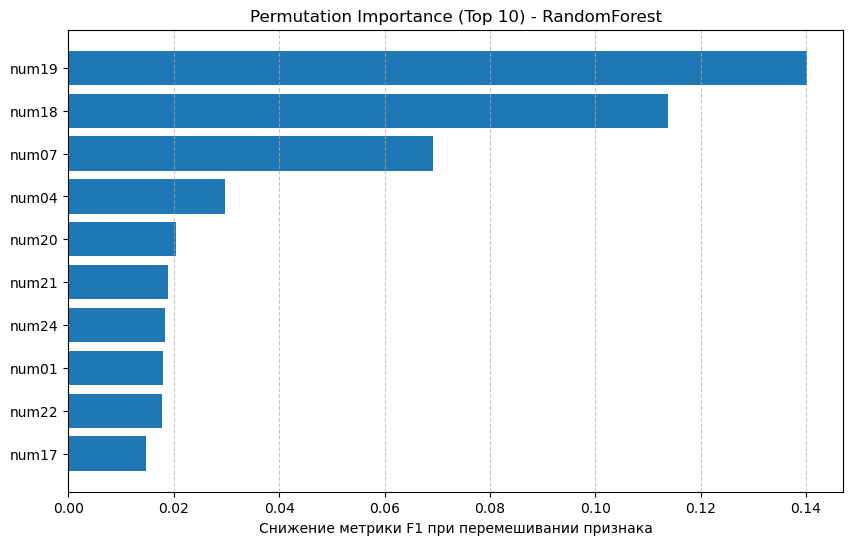

In [67]:
# выбираем лучшую модель из словаря результатов по ROC-AUC
best_model_name = max(results, key=lambda x: results[x]['ROC-AUC'])
best_model = None

if best_model_name == 'DecisionTree': best_model = dt_grid
elif best_model_name == 'RandomForest': best_model = rf_grid
elif best_model_name == 'GradientBoosting': best_model = gb_grid

print(f"Лучшая модель для анализа: {best_model_name}")

# считаем Permutation Importance на тестовых данных
# n_repeats = 10 - 10 раз перемешаем каждый признак для точности
perm_importance = permutation_importance(best_model, X_test, y_test,
                                         n_repeats=10, random_state=42, n_jobs=-1)

# визуализация
sorted_idx = perm_importance.importances_mean.argsort()[-10:]
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Снижение метрики F1 при перемешивании признака")
plt.title(f"Permutation Importance (Top 10) - {best_model_name}")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Краткая интерпретация


Ниболее значимыми для предсказания оказались признаки **num19**, **num18** и **num07**.

* **Ключевые факторы**: признаки **num19** и **num18** доминируют в модели — их перемешивание снижает метрику  на **~14%** и **~11%** соответственно. Значит, в них сосредоточена основная прогностическая информация.
* **Степень влияния**: наблюдается резкий разрыв между «лидерами» и остальными. Начиная с признака **num20**, влияние падает ниже **2%**, что указывает на избыточность или слабую информативность большей части набора данных.
* **Соответствие ожиданиям**: результат выглядит логичным для алгоритмов на основе деревьев. Мы видим, что модель нашла несколько доминирующих факторов (**num19, num18**), на которых строится большинство решающих правил. Это подтверждает, что настройка «лесных ручек» сработала правильно: даже при ограничении количества признаков для каждого дерева, модель стабильно выделяет эти ключевые переменные. Большое количество признаков с околонулевой важностью говорит о том, что данные содержат много второстепенной информации, которую **RandomForest** успешно игнорирует, не допуская переобучения

## <U>Артефакты эксперимента</U>

Все артефакты успешно сохранены в папку: artifacts/


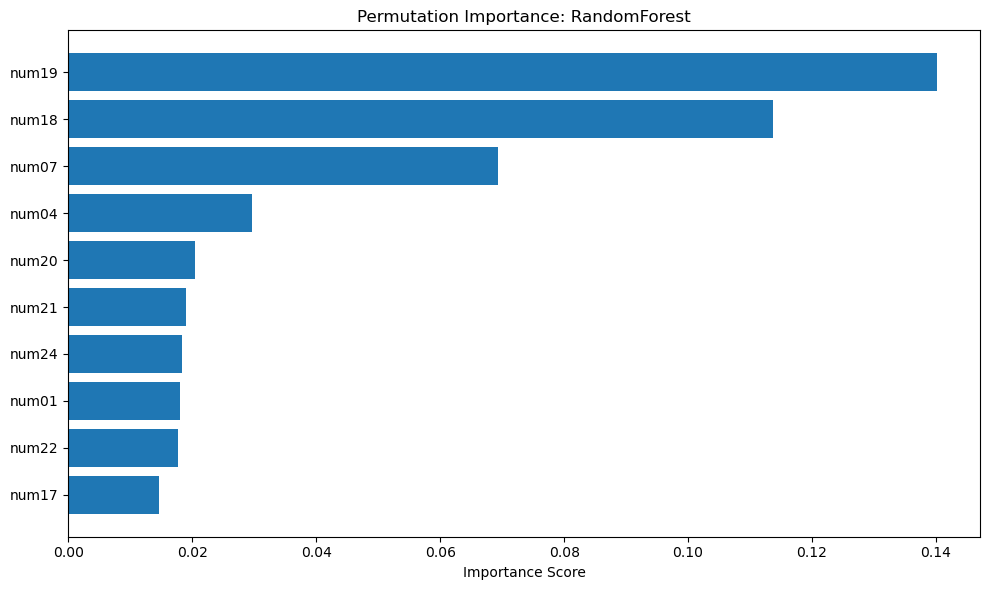

In [68]:
import os
import json
import joblib

ARTIFACTS_PATH = "artifacts/"
FIG_PATH = os.path.join(ARTIFACTS_PATH, "figures/")
os.makedirs(FIG_PATH, exist_ok=True)

# сохранение метрик
with open(os.path.join(ARTIFACTS_PATH, "metrics_test.json"), "w") as f:
    json.dump(results, f, indent=4)

# сохр. итогов поиска
search_summaries = {
    "DecisionTree": {
        "best_params": dt_grid.best_params_, 
        "best_cv_score": float(dt_grid.best_score_)
    },
    "RandomForest": {
        "best_params": rf_grid.best_params_, 
        "best_cv_score": float(rf_grid.best_score_)
    },
    "GradientBoosting": {
        "best_params": gb_grid.best_params_, 
        "best_cv_score": float(gb_grid.best_score_)
    }
}
with open(os.path.join(ARTIFACTS_PATH, "search_summaries.json"), "w") as f:
    json.dump(search_summaries, f, indent=4)

# сохр. самой модели
joblib.dump(best_model, os.path.join(ARTIFACTS_PATH, "best_model.joblib"))

# метаданные
best_model_meta = {
    "best_model": best_model_name,
    "best_params": best_model.best_params_,
    "test_metrics": results[best_model_name]
}
with open(os.path.join(ARTIFACTS_PATH, "best_model_meta.json"), "w") as f:
    json.dump(best_model_meta, f, indent=4)

fig.savefig(os.path.join(FIG_PATH, "diagnostics.png"))

perm_imp = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_imp.importances_mean.argsort()[-10:]

plt.figure(figsize=(10, 6))
plt.barh(X_test.columns[sorted_idx], perm_imp.importances_mean[sorted_idx])
plt.title(f"Permutation Importance: {best_model_name}")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.savefig(os.path.join(FIG_PATH, "importance.png"))

print(f"Все артефакты успешно сохранены в папку: {ARTIFACTS_PATH}")